In [9]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)



c:\Users\PC\Data\ads_enfit


In [10]:
from libs.common import *
from config.config import *

In [11]:
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/prj_exp"
os.makedirs(save_dir, exist_ok=True)

In [12]:
df_train = pd.read_csv(f'{save_dir}/df_train.csv', index_col=None)
df_valid = pd.read_csv(f'{save_dir}/df_valid.csv', index_col=None)



In [13]:
df_train

,Unnamed: 0,row_id,county,is_business,product_type,is_consumption,lowest_price_per_mwh,highest_price_per_mwh,eic_count,installed_capacity,...,day,weekday,month,year,segment,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour),target
0,0,366048,0,0,1,0,80.00,94.0,148.0,1345.69,...,1,6,1,2022,0,0.017166,0.999853,0.000000,1.000000,0.000
1,1,366049,0,0,1,1,80.00,94.0,148.0,1345.69,...,1,6,1,2022,1,0.017166,0.999853,0.000000,1.000000,442.226
2,2,366050,0,0,2,0,80.00,94.0,16.0,153.70,...,1,6,1,2022,2,0.017166,0.999853,0.000000,1.000000,0.000
3,3,366051,0,0,2,1,80.00,94.0,16.0,153.70,...,1,6,1,2022,3,0.017166,0.999853,0.000000,1.000000,44.899
4,4,366052,0,0,3,0,80.00,94.0,739.0,7638.62,...,1,6,1,2022,4,0.017166,0.999853,0.000000,1.000000,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088570,1106316,1472634,4,1,0,0,144.99,158.0,8.0,1710.00,...,11,7,12,2022,92,-0.352752,0.935717,-0.965926,0.258819,0.000
1088571,1106317,1472635,4,1,0,1,144.99,158.0,8.0,1710.00,...,11,7,12,2022,93,-0.352752,0.935717,-0.965926,0.258819,682.511
1088572,1106318,1472636,4,1,1,0,144.99,158.0,15.0,651.70,...,11,7,12,2022,94,-0.352752,0.935717,-0.965926,0.258819,0.000
1088573,1106319,1472637,4,1,1,1,144.99,158.0,15.0,651.70,...,11,7,12,2022,95,-0.352752,0.935717,-0.965926,0.258819,253.239


In [14]:
df_train=df_train.drop(columns=['Unnamed: 0'])
df_valid=df_valid.drop(columns=['Unnamed: 0'])


In [15]:
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_valid = df_valid.drop('target', axis=1)
y_valid = df_valid['target']

In [16]:

X_train.to_csv(f'{save_dir}/X_train.csv')
X_valid.to_csv(f'{save_dir}/X_valid.csv')
y_train.to_csv(f'{save_dir}/y_train.csv')
y_valid.to_csv(f'{save_dir}/y_valid.csv')

Evaluating LR...
neg_mean_absolute_error LR: -340.207 (2.580)
r2 LR: 0.481 (0.007)
Evaluating Ridge...
neg_mean_absolute_error Ridge: -340.204 (2.580)
r2 Ridge: 0.481 (0.007)
Evaluating Lasso...
neg_mean_absolute_error Lasso: -340.083 (2.582)
r2 Lasso: 0.481 (0.007)
Evaluating DT...
neg_mean_absolute_error DT: -33.839 (0.430)
r2 DT: 0.984 (0.002)
Evaluating LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7693
[LightGBM] [Info] Number of data points in the train set: 482548, number of used features: 44
[LightGBM] [Info] Start training from score 332.213122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

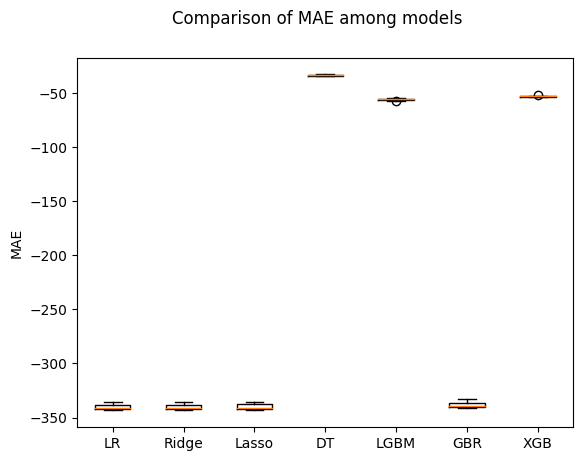

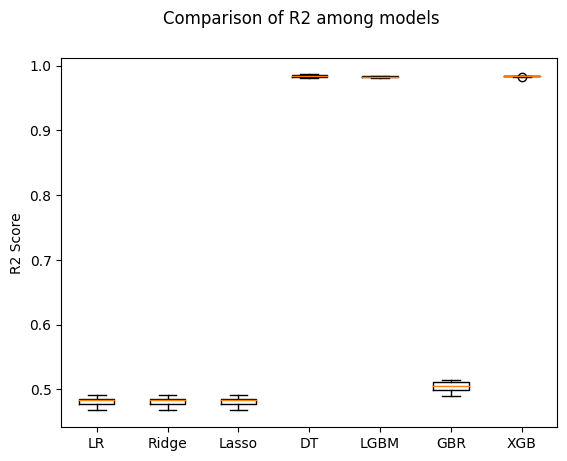

In [17]:


num_folds = 10
scorers = {'mae': make_scorer(mean_absolute_error), 'r2': make_scorer(r2_score)}
models = []

# Defining models
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge(alpha=1.0, random_state=seed)))
models.append(('Lasso', Lasso(alpha=0.1, random_state=seed)))
models.append(('DT', DecisionTreeRegressor(random_state=seed)))
models.append(('LGBM', lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.1, n_estimators=100, random_state=seed)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=seed)))
models.append(('XGB', xgb.XGBRegressor(objective='reg:squarederror',
    eval_metric='rmse',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    random_state=seed)))
# models.append(('SVR', SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)))

# Function to evaluate models
def check_model(name, model, X, y, scoring):
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    msg = f"{scoring} {name}: {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)
    return cv_results

results_mae = []
names_mae = []
results_r2 = []
names_r2 = []

# Evaluating models
for name, model in models:
    print(f"Evaluating {name}...")
    mae_result = check_model(name, model, X_valid, y_valid, scoring='neg_mean_absolute_error')
    results_mae.append(mae_result)
    names_mae.append(name)
    
    r2_result = check_model(name, model,  X_valid, y_valid, scoring='r2')
    results_r2.append(r2_result)
    names_r2.append(name)

# Plotting MAE
fig_mae = plt.figure()
fig_mae.suptitle('Comparison of MAE among models')
ax_mae = fig_mae.add_subplot(111)
plt.boxplot(results_mae)
ax_mae.set_xticklabels(names_mae)
plt.ylabel('MAE')
plt.show()

# Plotting R2
fig_r2 = plt.figure()
fig_r2.suptitle('Comparison of R2 among models')
ax_r2 = fig_r2.add_subplot(111)
plt.boxplot(results_r2)
ax_r2.set_xticklabels(names_r2)
plt.ylabel('R2 Score')
plt.show()
